#### Install Tweepy library
Option 1:
* Open Command line
* Install Twitter library using `conda install -c conda-forge tweepy`    

Option 2: 
* Open Anaconda Prompt
* `conda activate nameOfYourEnvironment`
* `pip install tweepy` (more info on [documentation](https://pypi.org/project/tweepy/))

#### Install wordcloud library 
Option 1: 
* Open Anaconda Prompt
* `conda activate nameOfYourEnvironment`
* `pip install wordcloud` (more info on [documentation](https://pypi.org/project/wordcloud/))

In [1]:
import tweepy as tw
import os
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

import matplotlib.pyplot as plt

# set working directory
os.chdir("C:/Users/ulloa-to/git/Advanced_Remote_sensing_HM")

#### Enter your API Keys and Tokens

In [ ]:
API_KEY = "PY38qcq6iZNBIQ3UWhHFl117U"
API_KEY_SECRET = "vmJOsvXLmfXo30ooZMTmSZvMuHQ7vOJW5muxL7OxCCtB8PD58a"
ACCESS_TOKEN = "427763917-UNkMBJ4Ymy4aQNNoWdNWRCnJdfsDOiZumFMo8hYO"
ACCESS_TOKEN_SECRET = "5gh1NAVqnc1sToLaBkwez7pYAuTKXhSNcyXRpVUMioFU4"

auth = tw.OAuthHandler(API_KEY, API_KEY_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tw.API(auth)

#### Search for specific hashtags

In [3]:
# define hashtag
search_query = "#remotesensing -filter:retweets -filter:replies"

Use the `tweepy.api` or [Twitter API wrapper](https://docs.tweepy.org/en/v3.5.0/api.html) to retrieve data from the different parts of a tweet and the Twitter community. 

In [4]:
# make the tweets search
search_results = api.search_tweets(q=search_query, lang="en", count = 100)

In [5]:
# print your tweet results with username: text

for tweet in search_results:
    print("")
    print(tweet.user.screen_name + ":")
    print(tweet.text)
    print("----")
    


EmisonTech:
Interested in #remotesensing? Check out this upcoming (FREE!) virtual event from the Pacific Southwest Region of… https://t.co/A8knXwBVwY
----

EmisonTech:
Interested in #remotesensing? Check out this upcoming (FREE!) virtual event from the Pacific Southwest Region of… https://t.co/wAvXWbl5km
----

NASA_DEVELOP:
Happy Veterans Day! @NASA_DEVELOP is proud to support those who have served, offering opportunities to veterans pur… https://t.co/GUVl3rZmZu
----

ESIPfed:
Sessions are in. Dates are set. And registration is open. See you (virtually) in January!
 https://t.co/CbOUHD1qGm… https://t.co/DLLJiVK8jy
----

earth_fromspace:
#Sentinel 2 (September 2015). NIR-SWIR1-Red, 52 km wide.
#Bare #Land in #HodhEchChargui, #Mauritania at 278-310 m e… https://t.co/NA28dkeG3h
----

UrbanTEP:
Congratulations to our @DLR_en colleagues for releasing the new version of the World Settlement Footprint (WSF2019)… https://t.co/2ONZCeqTX7
----

SARTRAC1:
Workshop 4 of #Morethanmaps for A-level 

Dump all the tweets into a Data Frame. This way you can export your data, and process it further. 

In [6]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
twdf = pd.DataFrame(data=[[tweet.user.screen_name, tweet.text, tweet.created_at] for tweet in search_results], columns=["UserName","Tweet_Text","Tweet_Date"])
twdf.head()

,UserName,Tweet_Text,Tweet_Date
0,EmisonTech,Interested in #remotesensing? Check out this upcoming (FREE!) virtual event from the Pacific Southwest Region of… https://t.co/A8knXwBVwY,2021-11-11 18:22:12+00:00
1,EmisonTech,Interested in #remotesensing? Check out this upcoming (FREE!) virtual event from the Pacific Southwest Region of… https://t.co/wAvXWbl5km,2021-11-11 18:15:07+00:00
2,NASA_DEVELOP,"Happy Veterans Day! @NASA_DEVELOP is proud to support those who have served, offering opportunities to veterans pur… https://t.co/GUVl3rZmZu",2021-11-11 16:19:45+00:00
3,ESIPfed,Sessions are in. Dates are set. And registration is open. See you (virtually) in January!\n https://t.co/CbOUHD1qGm… https://t.co/DLLJiVK8jy,2021-11-11 16:11:00+00:00
4,earth_fromspace,"#Sentinel 2 (September 2015). NIR-SWIR1-Red, 52 km wide.\n#Bare #Land in #HodhEchChargui, #Mauritania at 278-310 m e… https://t.co/NA28dkeG3h",2021-11-11 16:00:26+00:00


#### Retrieve information from your home

`API.home_timeline`: Returns the 20 most recent statuses, including retweets, posted by the authenticating user and that user’s friends. This is the equivalent of /timeline/home on the Web.

In [7]:
# define how many tweets you want to retrieve. Exclude retweets
home_tweets = api.home_timeline(count=100, exclude_replies = True)

In [8]:
#text file for wordcloud, if you want to filter your tweets. in this case by excluding everything not in english language
home_text_en = ""

for tweet in home_tweets:
    print("")
    print(tweet.user.screen_name + ":")
    if tweet.lang == "en":
        home_text_en += tweet.text+" "
    print(tweet.text)
    print("----")
    


UNDPClimate:
#ClimateChange remains one of the most critical issues of our time. Digital solutions can help us reduce its impact… https://t.co/Rv5PcmZwaZ
----

Pettorelli:
RT @adamvaughan_uk: #COP26 officially finishes 6pm Fri. Former UN climate chief @CFigueres tells me: "From the maturity of the [draft] text…
----

PIK_Climate:
RT @Forum4theFuture: As conversations gather pace at COP26, @jrockstrom, Director of the @PIK_Climate, reframes the question we all need to…
----

IPBES:
RT @JanBebbington: An important engagement opportunity @BathCBOS @UoBResponsible @sthlmresilience @PentlandCentre @ERGO_RG @cisl_cambridge…
----

NatGeo:
Happy #NativeAmericanHeritageMonth! We're doing a Q&amp;A with @insidenatgeo Explorer &amp; Poet Rena Priest (@RenaPriest).… https://t.co/JKbdlmPTEH
----

adriana_humanes:
RT @aveb_ve: La Tagura de Darwin. Ronda 1x8: Historias que Inspiran Vol 2: Una Microbióloga Pariaguanera🧫.

No olvides darle Like y comenta…
----

IPBES:
RT @RamsarConv: Rewetting #peatla

Dump all the tweets into a Data Frame. This way you can export your data, and process it further. 

In [9]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
homedf = pd.DataFrame(data=[[tweet.user.screen_name, tweet.text] for tweet in home_tweets], columns=["UserName", "Tweet_Text"])
homedf.head()

,UserName,Tweet_Text
0,UNDPClimate,#ClimateChange remains one of the most critical issues of our time. Digital solutions can help us reduce its impact… https://t.co/Rv5PcmZwaZ
1,Pettorelli,"RT @adamvaughan_uk: #COP26 officially finishes 6pm Fri. Former UN climate chief @CFigueres tells me: ""From the maturity of the [draft] text…"
2,PIK_Climate,"RT @Forum4theFuture: As conversations gather pace at COP26, @jrockstrom, Director of the @PIK_Climate, reframes the question we all need to…"
3,IPBES,RT @JanBebbington: An important engagement opportunity @BathCBOS @UoBResponsible @sthlmresilience @PentlandCentre @ERGO_RG @cisl_cambridge…
4,NatGeo,Happy #NativeAmericanHeritageMonth! We're doing a Q&amp;A with @insidenatgeo Explorer &amp; Poet Rena Priest (@RenaPriest).… https://t.co/JKbdlmPTEH


#### Explore specific users  

`api.user_timeline`: Returns the 20 most recent statuses posted from the authenticating user or the user specified. It’s also possible to request another user’s timeline via the id parameter.

In [10]:
userTweets = api.user_timeline(screen_name="NatGeo", count=100, include_rts = False, exclude_replies=True)

In [11]:
user_text_all = ""
for tweet in userTweets:
    user_text_all += tweet.text+" "
    print(tweet.text)

Happy #NativeAmericanHeritageMonth! We're doing a Q&amp;A with @insidenatgeo Explorer &amp; Poet Rena Priest (@RenaPriest).… https://t.co/JKbdlmPTEH
Originally in remembrance of the end of World War I—on the 11th month, the 11th day, and the 11th hour in 1918—toda… https://t.co/RaazaNnGZ0
Hospitals are incorporating new strategies to make medical procedures for infants—especially premature babies—less… https://t.co/iQA8YXULMe
Safe underground from the inhuman chaos of the battlefield above, the men of the First World War left their persona… https://t.co/u1rJRzsw7L
Along with their backpacks and growth spurts, students are bringing lingering trauma to school with them. "It’s not… https://t.co/hSJ7LR91aA
The tools and fashions of 18th-century wigmaking live on at the living history museum at Colonial Williamsburg, Vir… https://t.co/W0JDimrh4G
Find holy history and heavenly vintages in the northern reaches of this celebrated French wine-making region https://t.co/WucGyBr276
More than 200 

#### Process the text from your tweets search, and from your home

In [12]:
#combine all text to one big text
hometext = " ".join(twtext for twtext in homedf.Tweet_Text)
searchtext = " ".join(twtext for twtext in twdf.Tweet_Text)

Remove the stopwords in english from the text of the tweets

<function matplotlib.pyplot.show(close=None, block=None)>

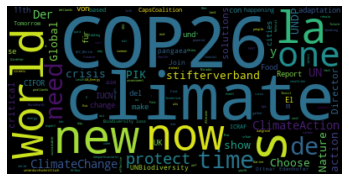

In [13]:
#set stopwords - words to be excluded
stopwords = set(STOPWORDS)
stopwords.update(["RT","t","co","https","amp"]) # include extra strings in this list

#generate word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(hometext)

#display image with pyplot
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show

In case there non-english letters, you can filter them.
Wordcloud can't display them, so I will use the text file I generated earlier with only tweets twitter detected to be in english language.

<function matplotlib.pyplot.show(close=None, block=None)>

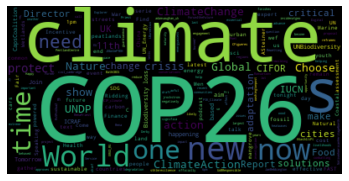

In [14]:
#same with only tweets detected to be in english
wordcloud2 = WordCloud(stopwords=stopwords).generate(home_text_en)

plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.show

Lets also try generating a wordcloud for all tweets of a single user. In our example, we used National Geographic, so we can make a wordcloud of the most common words from their 100 tweets retrieved. 

<function matplotlib.pyplot.show(close=None, block=None)>

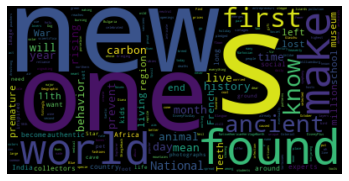

In [15]:
wordcloud_user = WordCloud(stopwords=stopwords).generate(user_text_all)

plt.imshow(wordcloud_user, interpolation="bilinear")
plt.axis("off")
plt.show

Now lets fit the wordcloud to a mask

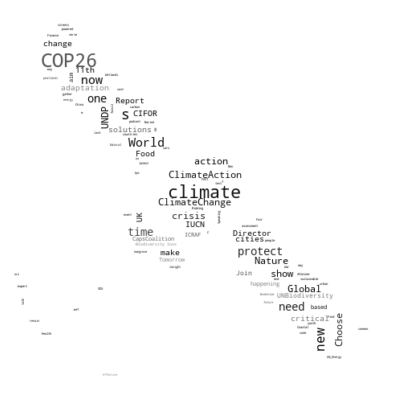

In [16]:
mask = np.array(Image.open("satellite.jpg"))
wordcloud_img = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", 
                         max_words=1000, mask=mask).generate(home_text_en)

#create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_img.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

#store to file
plt.savefig("satellite_wordcloud.png", format="png")

plt.show()

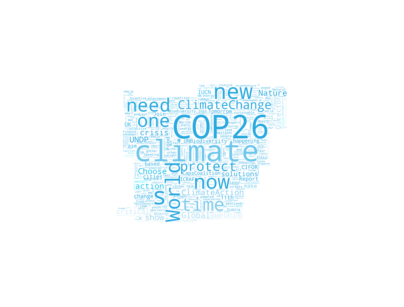

In [17]:
#the same with the twitter logo
mask = np.array(Image.open("twitter_logo.png"))
wordcloud_img = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", 
                         max_words=1000, mask=mask).generate(home_text_en)

#create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_img.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

#store to file
plt.savefig("twitter_wordcloud.png", format="png")

plt.show()

As you can see Wordcloud has some issues fitting to more complex shapes

####  Calculate histogram of words

<BarContainer object of 10 artists>

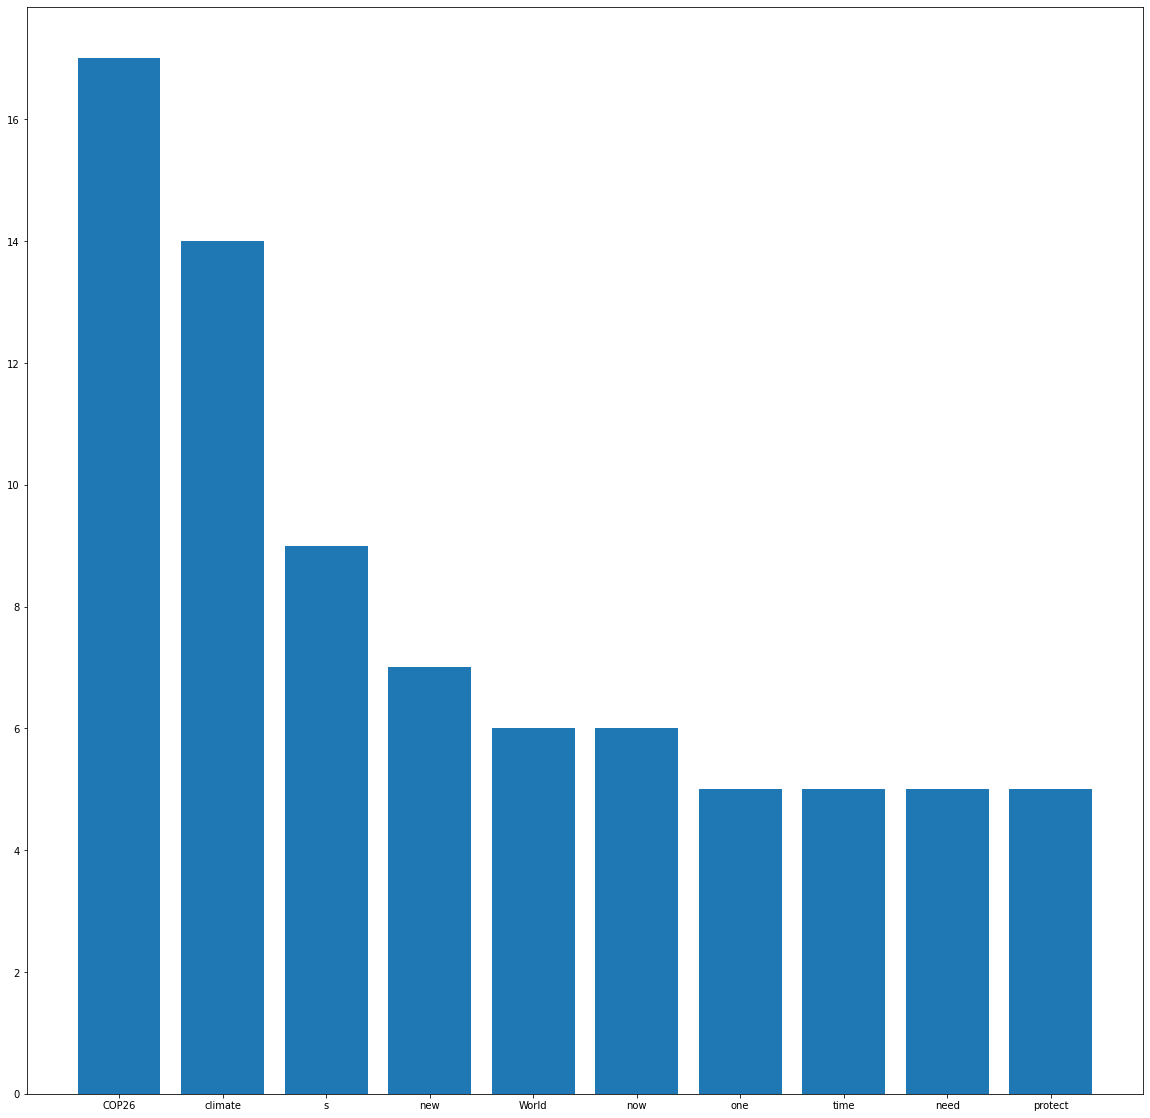

In [18]:
# lastly a histogram of the 10 most frequent words
from collections import Counter
freq = WordCloud(stopwords=stopwords).process_text(home_text_en)
k = Counter(freq)
highest = k.most_common(10) #this is a tuple object, not a dictionary

x_val = [x[0] for x in highest]
y_val = [x[1] for x in highest]

plt.figure(figsize=[20,20])
plt.bar(x_val,y_val)

There is a high frequency for the "s" letter. Probably, this has to do with the possesive form in the English language. Try to exclude this letter from the analysis by including it in the stopwords list. 